In [ ]:
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
def plot_stock_trend_and_returns(ticker, titles, start_date, end_date, all_returns):
    
    #get the data for this ticker
    prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
    volume = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Volume
    prices.index = [d.date() for d in prices.index]
    
    plt.figure(figsize=(10,6))
    
    #plot stock price
    plt.subplot(2,1,1)
    plt.plot(prices)
    plt.title(titles[0], fontsize=16)
    plt.ylabel('Price ($)', fontsize=14)
    
    #plot stock returns
    plt.subplot(2,1,2)
    plt.plot(all_returns[0], all_returns[1], color='g')
    plt.title(titles[1], fontsize=16)
    plt.ylabel('Pct. Return', fontsize=14)
    plt.axhline(0, color='k', linestyle='--')
    
    plt.tight_layout()
    
    plt.show()

In [ ]:

def perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks, verbose=False):
    """
    Inputs:
        ticker: the ticker symbol to analyze
        start_date: the first date considered in simulation
        end_date: the last date considered in simulation
        return_period_weeks: the number of weeks in which to calculate returns
        verbose: True if you want to print simulation steps
        
    Outputs:
        average and standard deviation of returns for simulated runs of this ticker within the given date range
    """
    
    #get the data for this ticker
    try:
        prices = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Close
        volume = web.DataReader(ticker, 'yahoo', start=start_date, end=end_date).Volume
        
    #could not find data on this ticker
    except (RemoteDataError, KeyError):
        #return default values
        return -np.inf, np.inf, None
    
    prices.index = [d.date() for d in prices.index]
    
    #this will store all simulated returns
    pct_return_after_period = []
    pct_v_return_after_period = []
    
    buy_dates = []

    #assume we buy the stock on each day in the range
    for buy_date, buy_price in prices.iteritems():
        #get price of the stock after given number of weeks
        sell_date = buy_date + timedelta(weeks=return_period_weeks)
        
        try:
            sell_price = prices[prices.index == sell_date].iloc[0]
            sell_v = volume[prices.index == sell_date].iloc[0]
            buy_v = volume[prices.index == buy_date].iloc[0]
        #trying to sell on a non-trading day, skip
        except IndexError:
            continue
        
        #compute the percent return
        pct_return = (sell_price - buy_price)/buy_price
        pct_volume = (sell_v - buy_v)/buy_v
        
        pct_return_after_period.append(pct_return)
        pct_v_return_after_period.append(pct_volume)
        
        buy_dates.append(buy_date)
        
        if verbose:
            print('Date Buy: %s, Price Buy: %s'%(buy_date,round(buy_price,2)))
            print('Date Sell: %s, Price Sell: %s'%(sell_date,round(sell_price,2)))
            print('Return: %s%%'%round(pct_return*100,1))
            print('-------------------')
    
    #if no data collected return default values
    if len(pct_return_after_period) == 0:
        return -np.inf, np.inf, None
    
        #if no data collected return default values
    if len(pct_v_return_after_period) == 0:
        return -np.inf, np.inf, None
    
    #report average and deviation of the percent returns
    return np.mean(pct_return_after_period), np.std(pct_return_after_period), np.mean(pct_v_return_after_period),np.std(pct_v_return_after_period),[buy_dates, pct_return_after_period]

In [ ]:
#start date for simulation. 
#Further back means more training data but risk of including patterns that no longer exist
#More recent means less training data but only using recent patterns
start_date, end_date = datetime(2020,10,1), datetime.now().date()

#set number of weeks in which you want to see return
return_period_weeks = 1

#I want at least this much average return
min_avg_return  = 0.15

#I want at most this much volatility in return
max_dev_return = 0.1
min_avg_vol = 0.0

In [ ]:
#Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = pickle.load(open("series_tickers.p", "rb" ))

In [ ]:
#filter_col = [col for col in series_tickers if col.startswith('Tesla')]
#filter_col


In [ ]:
for ticker, name in series_tickers.iteritems():
    try:
        avg_return, dev_return, avg_volume, dev_vol, all_returns = perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks)

        if avg_return > min_avg_return and dev_return < max_dev_return:
            title_price = '%s\n%s'%(ticker, name)
            title_return = 'Avg Return: %s%% |Avg Volume: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2), round(100* avg_volume,2))
            plot_stock_trend_and_returns(ticker, [title_price, title_return], start_date, end_date, all_returns)
    except:
          print("An exception occurred")


In [ ]:
# tickers = ['GE','TSLA','AMD']

In [ ]:
# for ticker in tickers:
#     avg_return, dev_return, avg_volume, dev_vol, all_returns = perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks)

#     if avg_return > min_avg_return and dev_return < max_dev_return:
#         plot_stock_trend_and_returns(ticker, [title_price, title_return], start_date, end_date, all_returns)
#         title_price = '%s\n%s'%(ticker, str(ticker))
#         title_return = 'Avg Return: %s%% |Avg Volume: %s%% | Dev Return: %s%%'%(round(100*avg_return,2), round(100*dev_return,2), round(100* avg_volume,2))


In [ ]:
web.DataReader('AAPL', 'yahoo', start=start_date, end=end_date)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Data

df = pd.DataFrame({
     'Net':[15,20,-10,-15], 
     'Date':['07/14/2020','07/15/2020','07/16/2020','07/17/2020']
})

df['Date'] = pd.to_datetime(df['Date'])

## here I'm adding a column with colors
df["Color"] = np.where(df["Net"]<0, 'red', 'green')

# Plot
df

In [ ]:
avg_return, dev_return, avg_volume, dev_vol, all_returns = perform_analysis_for_stock(ticker, start_date, end_date, return_period_weeks)


In [ ]:
df = web.DataReader('NIO', 'yahoo', start=start_date, end=end_date)

df.head()

In [ ]:
df['volume_before'] = df['Volume'].shift(1)
df['close_before'] = df['Close'].shift(1)
df = df.fillna(0)

df['relative_volume'] = (df['Volume'] - df['volume_before'])
df['relative_price'] = df['Close'] - df['close_before']
df["Color"] = np.where(df["relative_price"]<0, 'red', 'green')
df = df.reset_index()
df

In [ ]:
t1

In [ ]:
t1 = df[df['relative_price']<0]
t2 = df[df['relative_price']>=0]
plt.bar(t1['Date'], t1['Volume'], color='r')
plt.bar(t2['Date'], t2['Volume'], color='g')

In [ ]:
df

In [ ]:
df['color_one_before'] = df['Color'].shift(1)
df['color_tw_before'] = df['Color'].shift(2)
df = df.fillna(0)
df

In [ ]:
df = df.tail(3)
df = df.iloc[::-1]
df

In [ ]:
result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='green'  ,'yes','no')
print(result)

In [ ]:
df

In [ ]:
df['Color'][

In [1]:
import pandas_datareader.data as web
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader._utils import RemoteDataError
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
#Download file "series_tickers.p" from github or create your own list of tickers
series_tickers = pickle.load(open("series_tickers.p", "rb" ))

In [3]:
def is_this_a_winner(stock = 'NIO'):
    '''
    determine if a stock is winner, if the volume bar is green and the previous three are red
    
    inputs:
    ------ 
    dataframe
    
    returne:
    boolean: True, False
    '''
    
    start_date = datetime(2020,10,15)
    end_date = datetime.now().date()
    df = web.DataReader(stock, 'yahoo', start=start_date, end=end_date)
    df = df.reset_index()
    
    df['close_before'] = df['Close'].shift(1) 
    df['relative_price'] = df['Close'] - df['close_before']
    df["Color"] = np.where(df["relative_price"]<0, 'red', 'green')
    
    df = df.iloc[::-1]
    print(df)
    
    result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' ,True,False)
    #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)

    t1 = df[df['relative_price']<0]
    t2 = df[df['relative_price']>=0]
    plt.bar(t1['Date'], t1['Volume'], color='r')
    plt.bar(t2['Date'], t2['Volume'], color='g')
    return result
    
    

In [85]:
class stock:
    def __init__(self,stock = 'NIO'):
        self.stock = stock
    
    def get_df(self):
        start_date = datetime(2020,10,15)
        end_date = datetime.now().date()
        df = web.DataReader(self.stock, 'yahoo', start=start_date, end=end_date)
        df = df.reset_index()

        df['close_before'] = df['Close'].shift(1) 
        df['relative_price'] = df['Close'] - df['close_before']
        df["Color"] = np.where(df["relative_price"]<0, 'red', 'green')

        df = df.iloc[::-1]
        df = df.reset_index(drop = True)
        self.df = df
        return self.df  
    
    def is_this_a_winner(self):
        
        df = self.df

        result = np.where(df['Color'][0]=='green' and df['Color'][1]=='green' and df['Color'][2]=='green',True,False)
        #result = np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='red' and df['Color'][3]=='red' ,True,False)
        return result[()]
    
    def plot_df(self):
        
        df = self.df

        t1 = df[df['relative_price']<0]
        t2 = df[df['relative_price']>=0]
        plt.bar(t1['Date'], t1['Volume'], color='r')
        plt.bar(t2['Date'], t2['Volume'], color='g')
        plt.show()
        return 




        

In [59]:
my_stock = stock('VG')
my_stock.get_df()


,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,11.30,11.09,11.12,11.15,1994189,11.15,11.04,0.11,green
1,2020-10-19,11.14,10.88,10.97,11.04,2350700,11.04,10.91,0.13,green
2,2020-10-16,10.96,10.68,10.76,10.91,1295800,10.91,10.73,0.18,green
3,2020-10-15,10.74,10.34,10.46,10.73,2117200,10.73,NaN,NaN,green


True


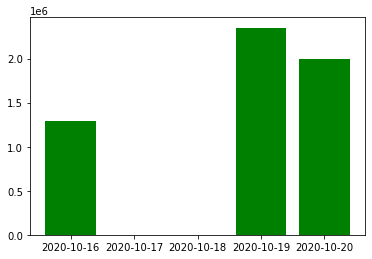

In [63]:
my_stock.is_this_a_winner()
my_stock.plot_df()


In [44]:
df = my_stock.get_df().reset_index(drop = True)

In [45]:
np.where(df['Color'][0]=='green' and df['Color'][1]=='red' and df['Color'][2]=='green' ,True,False)

array(True)

In [46]:
df['Color'][1]

'red'

In [47]:
df['Color'][0]

'green'

In [48]:
df['Color'][1]

'red'

In [49]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,28.299999,27.049999,27.420000,27.959999,103936992,27.959999,27.629999,0.33,green
1,2020-10-19,28.559999,27.219999,28.209999,27.629999,114786600,27.629999,28.480000,-0.85,red
2,2020-10-16,29.400000,27.940001,29.180000,28.480000,186764700,28.480000,28.070000,0.41,green
3,2020-10-15,29.230000,25.780001,27.200001,28.070000,385210600,28.070000,NaN,NaN,green


Vonage Holdings Corp. - Common Stock is a winner


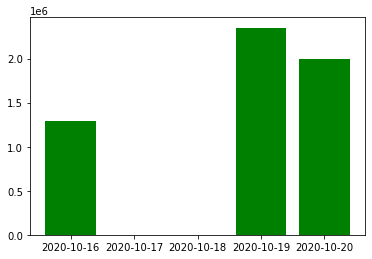

Cadence Design Systems, Inc. - Common Stock is not a winner
Urban One, Inc.  - Class A Common Stock is not a winner
Broadcom Inc. - Common Stock is not a winner
Adobe Inc. - Common Stock is not a winner
Alexion Pharmaceuticals, Inc. - Common Stock is not a winner
Limelight Networks, Inc. - Common Stock is not a winner
Maxim Integrated Products, Inc. - Common Stock is not a winner
Ares Capital Corporation - Closed End Fund is not a winner
Costco Wholesale Corporation - Common Stock is not a winner
Genius Brands International, Inc. - Common Stock is not a winner
Foresight Autonomous Holdings Ltd. - American Depositary Shares is not a winner
Curis, Inc. - Common Stock is not a winner
NortonLifeLock Inc. - Common Stock is not a winner
Gevo, Inc. - Common Stock is not a winner
Digital Ally, Inc. - Common Stock is not a winner
Qurate Retail, Inc. - Series A Common Stock is not a winner
Marriott International - Class A Common Stock is not a winner
Verastem, Inc. - Common Stock is not a winner

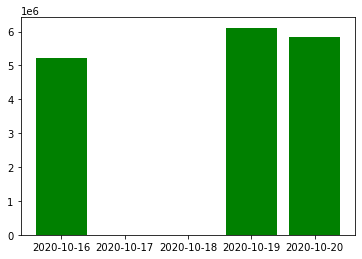

Endo International plc - Ordinary Shares is not a winner
Beyond Meat, Inc. - Common stock is not a winner
Yandex N.V. - Class A Ordinary Shares is not a winner
CommScope Holding Company, Inc. - Common Stock is not a winner
Digital Turbine, Inc. - Common Stock is not a winner
Duck Creek Technologies, Inc. - Common Stock is not a winner
Agenus Inc. - Common Stock is not a winner
Datadog, Inc. - Class A Common Stock is not a winner
Precipio, Inc. - Common Stock is not a winner
ZoomInfo Technologies Inc. - Class A Common Stock is not a winner
The Michaels Companies, Inc. - Common Stock is not a winner
eBay Inc. - Common Stock is not a winner
Evofem Biosciences, Inc. - Common Stock is not a winner
Chembio Diagnostics, Inc. - Common Stock is not a winner
Bilibili Inc. - American Depositary Shares is a winner


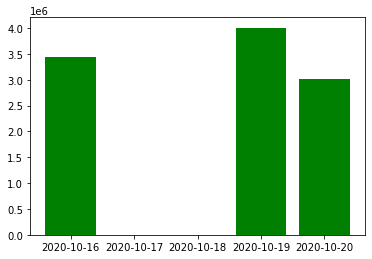

Zions Bancorporation N.A. - Common Stock is not a winner
Zoom Video Communications, Inc. - Class A Common Stock is not a winner
People's United Financial, Inc. - Common Stock is not a winner
Zosano Pharma Corporation - Common Stock is not a winner
DISH Network Corporation - Class A Common Stock is not a winner
Infinera Corporation - Common Stock is not a winner
ViacomCBS Inc. - Class B Common Stock is not a winner
The Carlyle Group Inc. - Common Stock is not a winner
OpGen, Inc. - Common Stock is not a winner
PepsiCo, Inc. - Common Stock is not a winner
Workday, Inc. - Class A Common Stock is not a winner
ImmunoGen, Inc. - Common Stock is not a winner
AYRO, Inc. - Common Stock is not a winner
Vanguard Total International Bond ETF is not a winner
Teradyne, Inc. - Common Stock is not a winner
Zillow Group, Inc. - Class C Capital Stock is not a winner
The Goodyear Tire & Rubber Company - Common Stock is not a winner
NantKwest, Inc. - Common Stock is not a winner
Dynavax Technologies Corpo

In [ ]:
winners = []
for ticker, name in series_tickers.iteritems():
    
    my_stock = stock(ticker)
    my_stock.get_df()
    x = my_stock.is_this_a_winner()
    if x == True:
        print(name,'is a winner')
        my_stock.plot_df()
        winners.append(ticker)
    else:
        print(name,'is not a winner')



In [93]:

winners

['VG']

In [75]:
my_stock = stock('VG')
my_stock.get_df()


,Date,High,Low,Open,Close,Volume,Adj Close,close_before,relative_price,Color
0,2020-10-20,11.30,11.09,11.12,11.15,1994189,11.15,11.04,0.11,green
1,2020-10-19,11.14,10.88,10.97,11.04,2350700,11.04,10.91,0.13,green
2,2020-10-16,10.96,10.68,10.76,10.91,1295800,10.91,10.73,0.18,green
3,2020-10-15,10.74,10.34,10.46,10.73,2117200,10.73,NaN,NaN,green


In [76]:
x = my_stock.is_this_a_winner()


In [84]:
x[()]

True

In [17]:
df = my_stock.get_df()


In [18]:
np.where(df['Color'][0]=='green' and df['Color'][1]=='green' and df['Color'][2]=='green' ,True,False)

array(True)

In [ ]:
    start_date = datetime(2020,10,15)
    end_date = datetime.now().date()

In [ ]:
df = web.DataReader('NIO', 'yahoo', start=start_date, end=end_date)


In [ ]:
df

In [ ]:
df.iloc[::-1]